In [12]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import glob
from scipy import interpolate

In [13]:
m = 4

eps = 1
omega = 1
T = 1e9

buk_vis = 6.0*10**(-59) * eps**2 * omega**(-2) * T**6
shear_vis = 347 * eps**(9/4) * T**(-2)

In [14]:
def freq_omega(Omega): # eigen frequency
    
    return 1

def alpha_m(m,M,R,period=0): # period is in unit second
    if period == 0:
        return 1
    else:
        # (piGrho) 3/4* gravitational constant in solar mass^-1*km^3*sec^-2 = 9.95e10
        unit = (9.95e10*(M/R**3))**(-0.5) # in solar mass and km
        template = np.genfromtxt("./Constant/alpha%s.txt"%m,names=('x,y'))
        f = interpolate.interp1d(template['x'], template['y'])

        freq = (2*np.pi/period)*(unit)
        if freq > 0.65:
            freq = 0.65

        am = f(freq)
        return round(np.float(am),5)
#         return 1

def gamma_m(m,M,R,period=0): # period is in unit second
    if period == 0:
        return 1
    else:
        unit = (9.95e10*(M/R**3))**(-0.5) # in solar mass and km
        template = np.genfromtxt("./Constant/gamma%s.txt"%m,names=('x,y'))
        f = interpolate.interp1d(template['x'], template['y'])

        freq = (2*np.pi/period)*(unit)
        if freq > 0.65:
            freq = 0.65

        gm = f(freq)

        return round(np.float(gm),5)
    
def epslion_m(m):
    return 1


def omega_m(m,M,R): # mass and radius (equation 16.70)
    col1 = 2*m*(m - 1)/(2*m + 1)
    col2 = 6.67e-20*M*2e30/R**3
    om = np.sqrt(col1 * col2)
    return om

In [15]:
def doublefactorial(n): 
    if (n == 0 or n == 1): 
        return 1; 
    return n * doublefactorial(n - 2);


def tau_GR_m(m,M,R): # m >= 0, mass, radius
    col1 = ( (m-1) * (doublefactorial(2*m+1))**2 ) / ( (m+1) * (m+2) )
    col2 = ( (2*m + 1) / (2*m*(m-1)) )**m
    col3 = 2/3 * (R/(M*1.48))**(m+1) * R/3e5
    tGRm = col1 * col2 * col3
    return tGRm

def tau_nu_m(m,M,R,nu=0,T=1e9): # radius (km), M (solar mass), T(K)
    rho = 3*M*1.98843e33/(4*np.pi*(R*1e5)**3) # gram cm^-3
    if nu == 0:
        nu = 347*rho**(5/4)*T**(-2)
    tnum = (R*1e5)**2 / ((2*m+1)*(m-1)) / nu
    return tnum

def tau_zeta_m(m,M,R,zeta=0,T=1e9): # mass(sun mass) radius (km)
    M = M*1.98843e33 # gram 
    R = R*1e5 # cm
    rho = 3*M/(4*np.pi*R**3) 
    T9=T/1e9
    zeta = 6e-59 * rho**2 * T**6
#     zetaM = 5e18*T9**6/w4**2
#     zetaD = 5e24*T9**4/w4**2
#     zetaE = 1e30*T9**2/w4**2
#     if zeta == 0:
#         zeta = zetaM
    tzetam = (0.5*(3/5)**4 * (m**3/(2*m+3)) * zeta/(rho*R**2))**(-1)
    return tzetam

tau_GR_m(2,1.4,13),tau_nu_m(2,1.4,13),tau_zeta_m(2,1.4,13)

(0.20903207914839314, 772125028.0432831, 1257.328688827387)

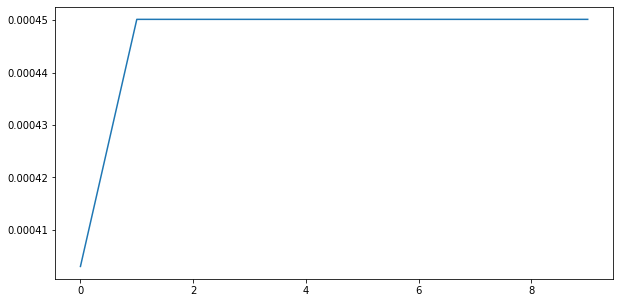

0.0004502

In [39]:
def Omega_GRR(m,M,R,nu=0,zeta=0,O=0,T=1e9): # mass, radius, shear viscosity, bulk viscosity, initial frequency
    col1 = omega_m(m,M,R)/m
    col2 = alpha_m(m,M,R,O) 
    col_25 = tau_GR_m(m,M,R)/tau_nu_m(m,M,R,nu,T) + tau_GR_m(m,M,R)/tau_zeta_m(m,M,R,zeta,T)*epslion_m(m)
    col3 = gamma_m(m,M,R,O) * (col_25)**(1/(2*m+1))
    GRR = col1 * (col2 + col3)
    return 2*np.pi/GRR #unit in second

def self_con_Omega_GRR(m,M,R,nu=0,zeta=0,O=0,T=1e9):
    period = []
    for i in range(10):
        O = Omega_GRR(m,M,R,nu,zeta,O,T)
        period.append(O)
    plt.figure(figsize=(10,5))
    plt.plot(period)
    plt.show()
    final_p = 0.5*(period[-1]+period[-2])
    return np.round(final_p,7) # in unit second

self_con_Omega_GRR(2,1.4,13,O=5,T=1e10)

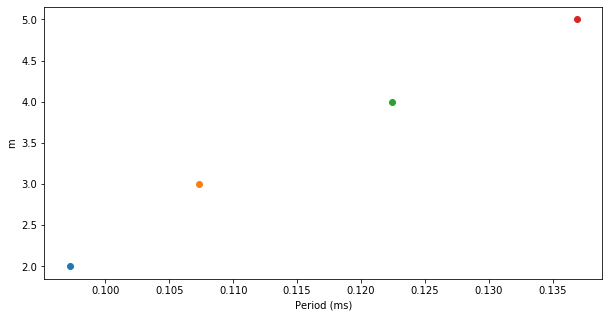

In [45]:
mass = 1.4
radius = 13
plt.figure(figsize=(10,5))
y = []
for m in range(2,6):
    y.append(Omega_GRR(m,mass,radius,T=4e10)*1000)
    plt.plot(y[-1],m,'o-')
plt.xlabel('Period (ms)')
plt.ylabel('m')
# plt.xlim(1,1.5)
plt.show()

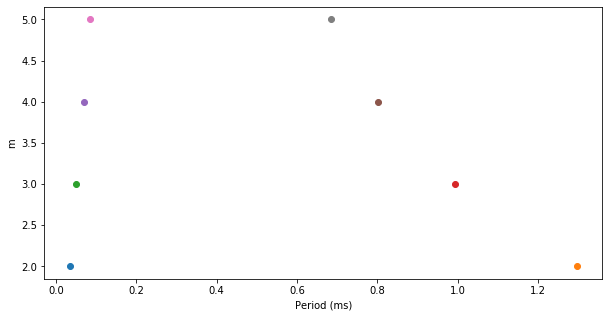

In [38]:
mass = 1.4
radius = 13
plt.figure(figsize=(10,5))
z = []
for m in range(2,6):
    z.append(Omega_GRR(m,mass,radius)*1000)
    plt.plot(y[m-2],m,'o-')
    plt.plot(z[-1],m,'o-')
plt.xlabel('Period (ms)')
plt.ylabel('m')
# plt.xlim(1,1.5)
plt.show()

In [35]:
y,z

([1.5037777642897423,
  1.430424342391559,
  1.3255682092086527,
  1.1904614148294026],
 [1.5037777642897423,
  1.430424342391559,
  1.3255682092086527,
  1.1904614148294026])

In [36]:
# sv = np.array([200,1,0.1,0.01,0.001])
# sv = np.array([2e3,2e5,2e7,2e9,2e11])
# y = self_con_Omega_GRR(3,1.3,11,0.01,0.01,0)*1000
# print(y)

# mass = 1.5
# radius = 12
# plt.figure(figsize=(10,5))
# for m in range(2,6):
#     y = []
#     for x in sv:
#         y.append(self_con_Omega_GRR(m,mass,radius,x)*1000)
#         plt.annotate(x,(y[-1],m))
#     plt.plot(y,[m,m,m,m,m],'o-')
# plt.xlabel('Period (ms)')
# plt.ylabel('m')
# # plt.xlim(1,1.5)
# plt.show()

# plt.figure(figsize=(10,5))
# for m in range(2,6):
#     y = []
#     for x in sv:
#         y.append(2*np.pi/Omega_GRR(m,mass,radius,x)*1000)
#         plt.annotate(x,(y[-1],m))
#     plt.plot(y,[m,m,m,m,m],'o-')
# plt.xlabel('Period (ms)')
# plt.ylabel('m')
# # plt.xlim(1,1.5)
# plt.show()

In [37]:
basedir = "/Users/laote/sdsu/Research/rotation"
twindir = basedir + "/EOS_twin"

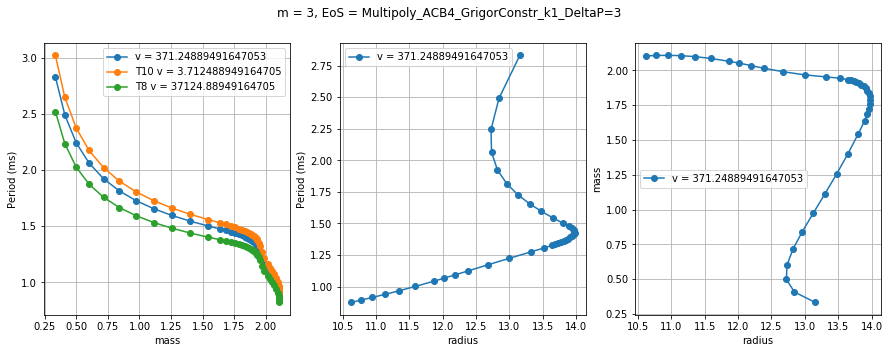

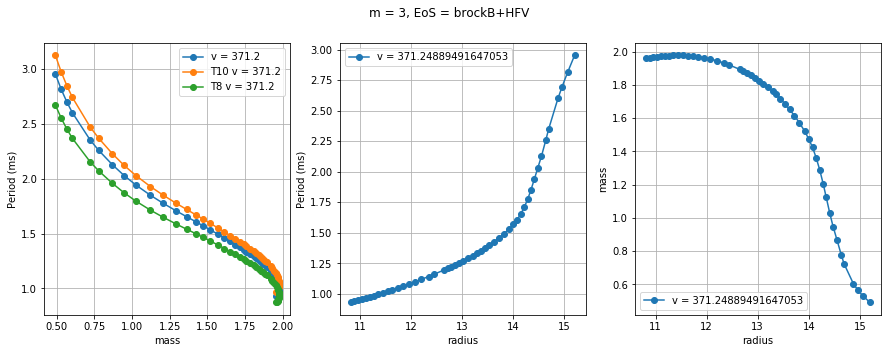

In [22]:
i = 7
datadir = twindir + "/%s.dat" %(i)
dataHT2 = np.genfromtxt(datadir,skip_header=649, skip_footer=1028-710,\
                        names='number,e_c,e_c_e_0,M_gr,M_by,M_pr,R_km,lg_A_rot,lg_I_g_cm2')
NSdir = twindir + "/outputHT.dat__HVfull"
NSHT2 = np.genfromtxt(NSdir,skip_header=753, skip_footer=1196-822,\
                         names='number,e_c,e_c_e_0,M_gr,M_by,M_pr,R_km,lg_A_rot,lg_I_g_cm2')
# NSdir = twindir + "/brockB+HFV.dat"
# NSHT2 = np.genfromtxt(NSdir,skip_header=649, skip_footer=1028-710,\
#                         names='number,e_c,e_c_e_0,M_gr,M_by,M_pr,R_km,lg_A_rot,lg_I_g_cm2')


M_gr = dataHT2['M_gr']
R = dataHT2['R_km']

NSM_gr = NSHT2['M_gr']
NSR = NSHT2['R_km']


T = 1e9 #K
m,r = 1.5,13.9
rho = 3*m*1.98843e33/(4*np.pi*(r*1e5)**3) # gram cm^-3
bb = 347*rho**(5/4)*T**(-2)


period = []
period_T10 = []
period_T8 = []
for i in range(len(M_gr)):
    period.append(self_con_Omega_GRR(3,M_gr[i],R[i])*1000)
    period_T10.append(self_con_Omega_GRR(3,M_gr[i],R[i],T=1e10)*1000)
    period_T8.append(self_con_Omega_GRR(3,M_gr[i],R[i],T=1e8)*1000)

plt.figure(figsize=(15,5))
plt.suptitle('m = 3, EoS = Multipoly_ACB4_GrigorConstr_k1_DeltaP=3')
plt.subplot(131)
plt.plot(M_gr,period,'o-',label = 'v = %s' %bb)
plt.plot(M_gr,period_T10,'o-',label = 'T10 v = %s' %(347*rho**(5/4)*1e10**(-2)))
plt.plot(M_gr,period_T8,'o-',label = 'T8 v = %s' %(347*rho**(5/4)*1e8**(-2)))
plt.ylabel('Period (ms)')
plt.xlabel('mass')
plt.grid()
plt.legend()

plt.subplot(132)
plt.plot(R,period,'o-',label = 'v = %s' %bb)
plt.ylabel('Period (ms)')
plt.xlabel('radius')
plt.grid()
plt.legend()

plt.subplot(133)
plt.plot(R,M_gr,'o-',label = 'v = %s' %bb)
plt.ylabel('mass')
plt.xlabel('radius')
plt.grid()
plt.legend()

plt.show()



period = []
period_T10 = []
period_T8 = []
for i in range(len(NSM_gr)):
    period.append(self_con_Omega_GRR(3,NSM_gr[i],NSR[i])*1000)
    period_T10.append(self_con_Omega_GRR(3,NSM_gr[i],NSR[i],T=1e10)*1000)
    period_T8.append(self_con_Omega_GRR(3,NSM_gr[i],NSR[i],T=1e8)*1000)
    
plt.figure(figsize=(15,5))
plt.suptitle('m = 3, EoS = brockB+HFV')
plt.subplot(131)
plt.plot(NSM_gr,period,'o-',label = 'v = %s' %round(bb,1))
plt.plot(NSM_gr,period_T10,'o-',label = 'T10 v = %s' %round(bb,1))
plt.plot(NSM_gr,period_T8,'o-',label = 'T8 v = %s' %round(bb,1))
plt.ylabel('Period (ms)')
plt.xlabel('mass')
plt.grid()
plt.legend()

plt.subplot(132)
plt.plot(NSR,period,'o-',label = 'v = %s' %bb)
plt.ylabel('Period (ms)')
plt.xlabel('radius')
plt.grid()
plt.legend()

plt.subplot(133)
plt.plot(NSR,NSM_gr,'o-',label = 'v = %s' %bb)
plt.ylabel('mass')
plt.xlabel('radius')
plt.grid()
plt.legend()

plt.show()

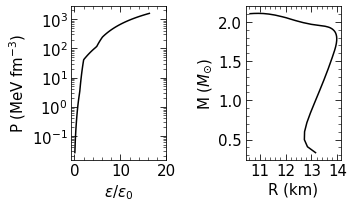

In [17]:
from pylab import *

EoSdir = twindir + "/prns_eos__Multipoly_ACB4_GrigorianConstr_k1_DeltaP=7.dat"
dataEoS = np.genfromtxt(EoSdir,skip_header=2, skip_footer=1,names='n,p,e')


fs=15
plt.figure(figsize=(5,3))
plt.subplot(121)
plt.plot(dataEoS['n']/140,dataEoS['p'],'k-')
plt.yscale('log')
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
minorticks_on()
tick_params(which='both',top='on',bottom='on',left='on',right='on')
tick_params(which='major',direction='in',length=6)
tick_params(which='minor',direction='in',length=3)
plt.ylabel('P ($\mathrm{MeV\;fm^{-3}}$)',fontsize=fs)
plt.xlabel('$\epsilon/\epsilon_0$',fontsize=fs)
plt.xticks([0,10,20])


plt.subplot(122)
plt.plot(R,M_gr,'k-')
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
minorticks_on()
tick_params(which='both',top='on',bottom='on',left='on',right='on')
tick_params(which='major',direction='in',length=6)
tick_params(which='minor',direction='in',length=3)
plt.ylabel('M ($M_{\odot}$)',fontsize=fs)
plt.xlabel('R (km)',fontsize=fs)
plt.tight_layout()
plt.xticks([11,12,13,14])

plt.savefig('imgt.eps')
plt.show()

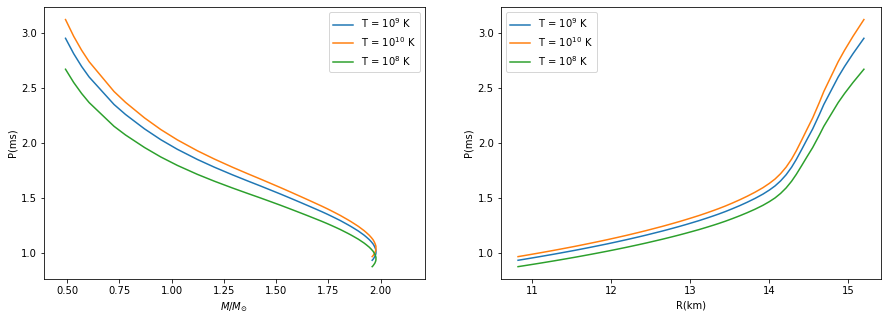

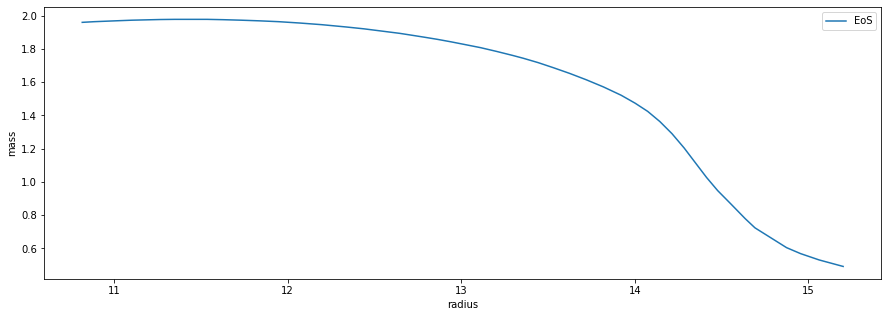

In [18]:
plt.figure(figsize=(15,5))
# plt.suptitle('m = 3, EoS = HV, v = %.0f'%bb)
plt.subplot(121)
plt.plot(NSM_gr,period,'-',label = 'T = $10^9$ K')
plt.plot(NSM_gr,period_T10,'-',label = 'T = $10^{10}$ K')
plt.plot(NSM_gr,period_T8,'-',label = 'T = $10^{8}$ K')
plt.xlim(0.39,2.21)
plt.ylabel('P(ms)')
plt.xlabel('$M/M_{\odot}$')
plt.legend()

plt.subplot(122)
plt.plot(NSR,period,'-',label = 'T = $10^9$ K')
plt.plot(NSR,period_T10,'-',label = 'T = $10^{10}$ K')
plt.plot(NSR,period_T8,'-',label = 'T = $10^{8}$ K')
plt.ylabel('P(ms)')
plt.xlabel('R(km)')
plt.legend()
# plt.tight_layout()

plt.show()

plt.figure(figsize=(15,5))
# plt.title('EoS of HV')
plt.plot(NSR,NSM_gr,'-',label = 'EoS')
plt.ylabel('mass')
plt.xlabel('radius')
plt.legend()

plt.show()

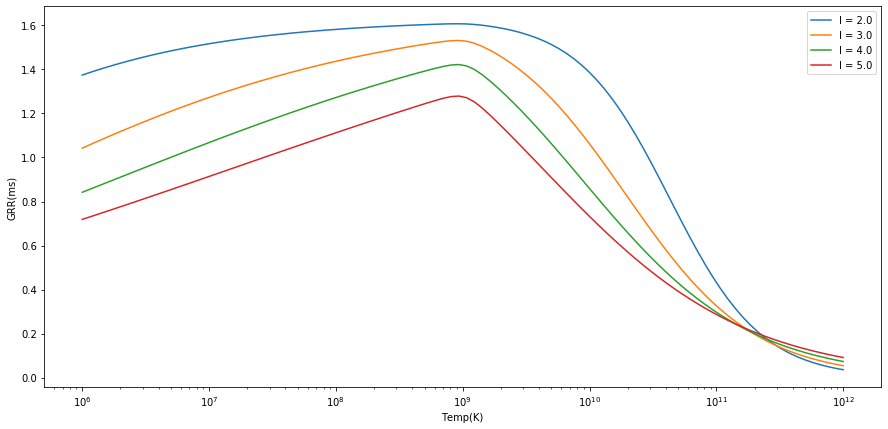

In [38]:
Temp = np.logspace(6,12,100)
 
plt.figure(figsize=(15,7))
for l in range(2,6):
    GRR = []   
    for TE in Temp:
        GRR.append(self_con_Omega_GRR(l,1.5,13.9,T=TE)*1000)
    plt.plot(Temp,GRR,'-',label='l = %.1f'%l)
plt.xscale('log')
plt.ylabel('GRR(ms)')
plt.xlabel('Temp(K)')
# plt.grid()
plt.legend()

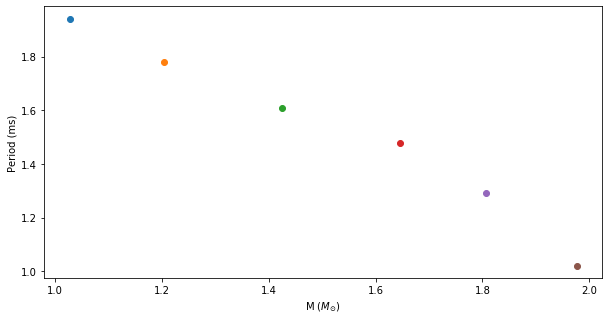

In [20]:
mass_range = [1.027,1.204,1.424,1.645,1.807,1.977]
radius_range = [14.413, 14.284, 14.074, 13.921, 13.111, 11.536]
plt.figure(figsize=(10,5))
for i in range(6):
    y = self_con_Omega_GRR(3,mass_range[i],radius_range[i])*1000
    plt.plot(mass_range[i],y,'o-')
plt.ylabel('Period (ms)')
plt.xlabel('M ($M_{\odot}$)')
# plt.xlim(1,1.5)
plt.savefig('a.eps')
plt.show()

In [ ]:
tau_nu_m(2,1.4,13)